<a href="https://colab.research.google.com/github/ismailyou/named_entity_reco/blob/main/Named_Enitity_Extraction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# NER - Named Entity Recognition

<div class="alert alert-info"><font color=black>**— sometimes referred to as entity chunking, extraction, or identification —**</font></div>

No algorithm can 100% identify all the named entities correctly

## THE PLAN :

1.   What does NER mean ?
2.   How NER works ?
3.   Why it is important?
3.   Named Entity Recognition use cases
4.   Load Dependencies
5.   Load Corpus
    - Web Scraping using BeautifulSoup
    - load to the drive
6.   Basic Named Entity (NE) tagging using NLTK
    - Word Based
    - Sentence Based
7.   More powerful package
    - Stanford NLP NER
    - Spacy


## What does NER mean ?

Is the task of identifying and categorizing key information (entities) in text. An entity can be any word or series of words that consistently refers to the same thing. Every detected entity is classified into a predetermined category. For example, an NER machine learning (ML) model might detect the word “Google” in a text and classify it as a “Company”.

**e.g:**

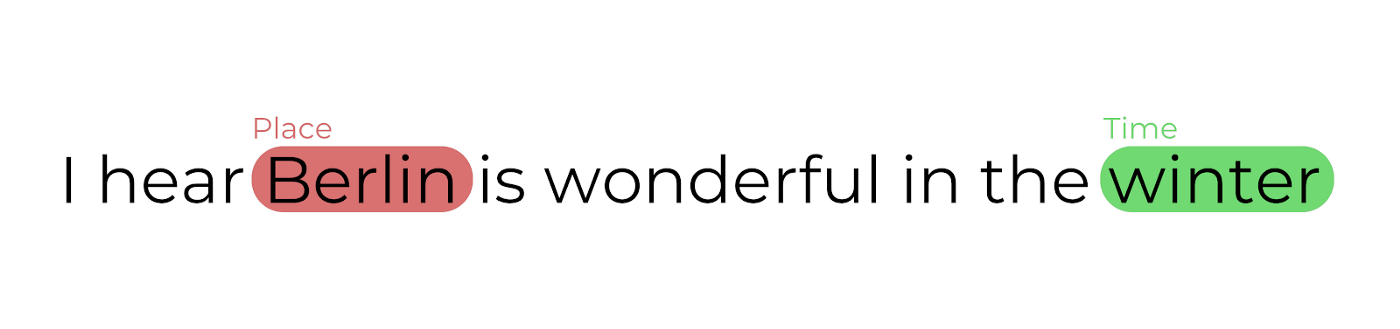

## How NER works ?

At the heart of any NER model is a two step process:
1.  Detect a named entity : this step involves detecting a word or string of words that form an entity. Each word represents a token. Inside-outside-beginning tagging is a common way of indicating where entities begin and end.

2.  Categorize the entity : This step requires the creation of entity categories. Here are some common entity categories:

These are just a few examples

  - **Person** 
  - **Organization** 
  - **Time**
  - **Location**
  - **Work of art**

## Why it is important ?

With NER, we can understand the subject or theme of a body of text and quickly group texts based on their relevancy or similarity.


**Any NLP task which involves automatically understanding text and acts based on it, needs Named Entity Recognition in its pipeline**



## Named Entity Recognition use cases

**`Wherever there are large quantities of text, NER can make life easier`**

* **Academia**
Enable students and researchers to find relevant material faster by summarizing papers and archive material and highlighting key terms, topics, and themes

* **Human resources** : Speed up the hiring process by summarizing applicants’ CVs.

* **Search and recommendation engines** : 
Improve the speed and relevance of search results and recommendations by summarizing descriptive text, reviews, and discussions.

* **Health care**
Improve patient care standards and reduce workloads by extracting essential information from lab reports
<br>[Roche](https://conferences.oreilly.com/strata/strata-ca-2019/public/schedule/detail/72568.html) is doing this with pathology and radiology reports

## Load Dependencies

We are using 
  - [NLTK](https://www.nltk.org/)
  - [SpaCy](https://spacy.io/) spaCy is an open-source Python library that parses and “understands” large volumes of text. 
  - [Stanford NER](https://nlp.stanford.edu/software/CRF-NER.shtml)

In [212]:
import spacy
import nltk


print("SpaCy Version :", spacy.__version__)
print("nltk Version :", nltk.__version__)

SpaCy Version : 2.2.4
nltk Version : 3.2.5


## Load Corpus

### Web Scraping using Requests and BuetufulSoup

In [17]:
import requests
from bs4 import BeautifulSoup

print("requests Version :", requests.__version__)

requests Version : 2.23.0


Am geting an article about a Berber queen 7th centry, **Feel free** to replace the URL to your favorite article in the wikipedia page.

In [71]:
url  = "https://en.wikipedia.org/wiki/Dihya";

file = "/content/datas.txt"

s = requests.get(url)

data = s.text.encode("utf-8")

soup = BeautifulSoup(data, "lxml")

heading = soup.find("h1", {"id": "firstHeading"})

content = soup.findAll("p")

with open(file, "a+") as f:
  f.write(str(heading.get_text())+ "\n")
  for i in content:
    f.write(i.get_text())



In [187]:
urls = {
    "english" : "https://en.wikipedia.org/wiki/Morocco",
    "french" : "https://fr.wikipedia.org/wiki/Maroc",
    "arabic" : "https://ar.wikipedia.org/wiki/%D8%A7%D9%84%D9%85%D8%BA%D8%B1%D8%A8",
    "darija" : "https://ary.wikipedia.org/wiki/%D8%A7%D9%84%D9%85%D8%BA%D8%B1%D9%8A%D8%A8",
}

file = "/content/datas_{name}.txt"

for key in urls:
    print(key, 'language')
    s = requests.get(urls[key])

    data = s.text.encode("utf-8")

    soup = BeautifulSoup(data, "lxml")

    # heading = soup.find("h1", {"id": "firstHeading"})

    content = soup.findAll("p")

    file = "/content/data_"+ key +".txt"
    print("Creating : ", file)

    with open(file, "w+") as f:
      # f.write(str(heading.get_text())+ "\n")
      for i in content:
        f.write(i.get_text())


english language
Creating :  /content/data_english.txt
french language
Creating :  /content/data_french.txt
arabic language
Creating :  /content/data_arabic.txt
darija language
Creating :  /content/data_darija.txt


### Load to drive

upload the data to drive to feautur uses

In [239]:
from google.colab import drive

file_names = [
      "/content/data_english.txt", "/content/data_french.txt",
      "/content/data_arabic.txt", "/content/data_darija.txt"
]

drive.mount('/content/drive')
#path = '/content/drive/MyDrive/data/data_wiki.txt'
data = {}
prefix_path = "/content/drive/MyDrive"
for file in file_names:
  path = prefix_path + "" + file
  print("The content of ", path, "\n")
  with open(path, 'w') as fwrite:
    with open(file, "r") as fread:
      data[file[9: -4]] = fread.read()
    fwrite.write(data[file[9: -4]])

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).
The content of  /content/drive/MyDrive/content/data_english.txt 

The content of  /content/drive/MyDrive/content/data_french.txt 

The content of  /content/drive/MyDrive/content/data_arabic.txt 

The content of  /content/drive/MyDrive/content/data_darija.txt 



In [240]:
data

{'data_arabic': 'المَغْرِبُ رسميًا المَمْلَكَةُ المَغْرِبِيَّةُ (بالأمازيغية: ⵜⴰⴳⵍⴷⵉⵜ ⵏ ⵍⵎⵖⵔⵉⴱ، تاكُلديت ن لمغريب) هي دولة إسلامية[19] تقع في أقصى غرب شمال أفريقيا، عاصمتها الرباط وأكبر مدنها الدار البيضاء؛ تُطل على البحر المتوسط شمالًا والمحيط الأطلسي غربًا، وتحدها الجزائر شرقًا[20] وموريتانيا جنوبًا؛[21] وفي الشريط البحري الضيق الفاصل بين المغرب وإسبانيا ثلاث مكتنفات متنازع عليها بين البلدين وهي سبتة ومليلية وصخرة قميرة.[22]\nيَنص الدستور على أن الدولة إسلامية وأن البلاد متعددة الثقافات: «المملكة المغربية دولة إسلامية (...) الموحدة بانصهار كل مكوناتها، العربية الإسلامية، والأمازيغية، والصحراوية الحسانية، والغنية بروافدها الأفريقية والأندلسية والعبرية والمتوسطية».[6][19]\nالمغرب عضو في جامعة الدول العربية، الاتحاد من أجل المتوسط، والاتحاد الأفريقي؛[23] توجد شراكة استراتيجية مع مجلس التعاون الخليجي،[24] شراكة اقتصادية مع الاتحاد الأوروبي،[25] شراكة عسكرية مع حلف شمال الأطلسي،[26] كما يوجد توجه نحو الاستثمار بالبلدان الأفريقية.[27]\nالمغرب دولة ذات نظام ملكي دستوري ببرلمان يتم انتخابه.[

### Data Cleansing

In [190]:
import re
def clean_data(text):
    text=text.encode("utf-8",errors='ignore').decode("utf-8")
    text=re.sub("https?:.*(?=\s)",'',text)
    text=re.sub("[’‘\"]","'",text)
    text=re.sub("[^\x00-\x7f]+",'',text)
    text=re.sub('[#&\\*+/<>@[\]^`{|}~ \t\n\r]',' ',text)
    text=re.sub('\(.*?\)','',text)
    text=re.sub('\=\=.*?\=\=','',text)
    text=re.sub(' , ',',',text)
    text=re.sub(' \.','.',text)
    text=re.sub("  +",' ',text)
    text=re.sub(";",'and',text)
    return text.strip()

In [241]:
english_text = clean_data(data["data_english"])
french_text = clean_data(data["data_french"])
arabic_text = clean_data(data["data_arabic"])

In [192]:
english_text

"Coordinates:.mw-parser-output.geo-default,.mw-parser-output.geo-dms,.mw-parser-output.geo-dec display:inline.mw-parser-output.geo-nondefault,.mw-parser-output.geo-multi-punct display:none.mw-parser-output.longitude,.mw-parser-output.latitude white-space:nowrap 32N 6W 32N 6W 32and -6 Morocco, a officially the Kingdom of Morocco, b is the northwesternmost country in the Maghreb region of North Africa. It overlooks the Mediterranean Sea to the north and the Atlantic Ocean to the west, and has land borders with Algeria to the east, and the disputed territory of Western Sahara to the south. Morocco also claims the Spanish exclaves of Ceuta, Melilla and Pen de Vlez de la Gomera, and several small Spanish-controlled islands off its coast. 13 It spans an area of 446,550km2 or 710,850km2,b with a population of roughly 37 million. Its official and predominant religion is Islam, and the official languages are Arabic and Berberand the Moroccan dialect of Arabic and French are also widely spoken. 

In [193]:
french_text

"Pages pour les diteurs dconnects Royaume du Maroc 1 en arabe: 34 2 Nord 6 51 Ouestmodifier Le Maroc,ou depuis 1957, en forme longue le royaume du Maroc, autrefois appel Empire chrifien, est un tat unitaire rgionalis situ en Afrique du Nord. Son rgime politique est une monarchie constitutionnelle. Sa capitale administrative et politique est Rabat et sa plus grande ville, ainsi que sa capitale conomique, est Casablanca. Gographiquement, il est notamment caractris par des zones montagneuses ou dsertiques et est l'un des seuls pays avec l'Espagne et la France comporter des rives sur la mer Mditerrane d'un ct et l'ocan Atlantique de l'autre. Sa population est de prs de 34millions d'habitants et sa superficie de 446550km2 19 ,ou de 710850km2 en incluant le Sahara occidental 20,21 ex-Sahara espagnol, considr comme un territoire non autonome par l'Organisation des Nations unies 2 dont il administre de facto environ 80% et qu'il revendique dans sa totalit, tout comme le Front Polisario. Sa cul

In [196]:
arabic_text

"19 20 21 . 22 : . 6 19 23 24 25 26 . 27 . 6 45,44% 28 125 . 29 . 30 31 40 32 . 33 34 35 . 36 . 37 : ' ' ' ' ' ' . 38 ' ' 34 ' ' 39 40 : . 1991 2017 300.000 . 41 42 : . 43 20.000 5000 . 44 . 45 5000 . . . 46 47 : . 43 . 48 '' ' '. 49 50 51 . 52 . 53 54 . 55 56 . 57 . 58 285 . 59 . 60 61 670 . 65 . 66 67 788. 68 789 808 . 69 786 . 70 71 803. 72 73 74 75 . 76 . 77 1659. 79 1631 1666. 80 81 1684 . 82 1787. 83 84 . 1777 . 85 86 : 87 1510 1822 . 90 . 91 92 93 94 . 95 1912 1925: . 96 : : : . 96 1529 . 1517 98 . 99 1514 . 100 1591 . 101 102 103 . 104 105 1787. 106 107 . 109 15. 110 7% . 111 90 . 90 87 . 90 1907 1912 112 7 1906 113 114 1923. 115 116 . 117 11 1944 . 118 29 1956. 119 1958. 120 121 3 1961 1962 . 122 1969. 123 124 1975 . 125 33,986,655 2017. 126 . 127 . 128 129 265 1948 2018 2.200 . 130 2015 250 250 150 150 100. 131 700,000 132 . 133 1,1% 380 2009. 134 . 135 136 137 150 138 . 139 50% . 140 . 141 . 6 13,5 32 45% 142 143 : . 144 15 . . 50% 90% . 2006 . 146 . 2000 . 147 41% 5 40 . 14

#### Cleaning Arabic corpus

In [324]:
def clean_arabic(data):
  text = ''.join([i if ord(i) > 128 or i == '.' else ' ' for i in data])
  text = text.encode("utf-8",errors='ignore').decode("utf-8")
  text=re.sub("https?:.*(?=\s)",'',text)
  text=re.sub("[’‘\"]","'",text)
  text=re.sub('[#&\\*+/<>@[\]^`{|}~ \t\n\r]',' ',text)
  text=re.sub('\(.*?\)','',text)
  text=re.sub('\=\=.*?\=\=','',text)
  text=re.sub(' , ',',',text)
  text=re.sub(' \.','.',text)
  text=re.sub("  +",' ',text)
  text=re.sub("(;|▲|\ufeff|°|ã|\u2002|é|É|è|«|»)",'',text)
  text=re.sub("[\xa0]",'',text)
  text = ' '.join([i for i in text.split() if len(i) > 1 or i == "."])
  return text

arabic_text = clean_arabic(data["data_arabic"])
len(arabic_text.split("."))

330

In [325]:
arabic_text = clean_arabic(data["data_arabic"])
darija_text = clean_arabic(data["data_darija"])

In [326]:
data["data_arabic"]

'المَغْرِبُ رسميًا المَمْلَكَةُ المَغْرِبِيَّةُ (بالأمازيغية: ⵜⴰⴳⵍⴷⵉⵜ ⵏ ⵍⵎⵖⵔⵉⴱ، تاكُلديت ن لمغريب) هي دولة إسلامية[19] تقع في أقصى غرب شمال أفريقيا، عاصمتها الرباط وأكبر مدنها الدار البيضاء؛ تُطل على البحر المتوسط شمالًا والمحيط الأطلسي غربًا، وتحدها الجزائر شرقًا[20] وموريتانيا جنوبًا؛[21] وفي الشريط البحري الضيق الفاصل بين المغرب وإسبانيا ثلاث مكتنفات متنازع عليها بين البلدين وهي سبتة ومليلية وصخرة قميرة.[22]\nيَنص الدستور على أن الدولة إسلامية وأن البلاد متعددة الثقافات: «المملكة المغربية دولة إسلامية (...) الموحدة بانصهار كل مكوناتها، العربية الإسلامية، والأمازيغية، والصحراوية الحسانية، والغنية بروافدها الأفريقية والأندلسية والعبرية والمتوسطية».[6][19]\nالمغرب عضو في جامعة الدول العربية، الاتحاد من أجل المتوسط، والاتحاد الأفريقي؛[23] توجد شراكة استراتيجية مع مجلس التعاون الخليجي،[24] شراكة اقتصادية مع الاتحاد الأوروبي،[25] شراكة عسكرية مع حلف شمال الأطلسي،[26] كما يوجد توجه نحو الاستثمار بالبلدان الأفريقية.[27]\nالمغرب دولة ذات نظام ملكي دستوري ببرلمان يتم انتخابه.[6] في الانتخابات

In [327]:
arabic_text

'المَغْرِبُ رسميًا المَمْلَكَةُ المَغْرِبِيَّةُ بالأمازيغية ⵜⴰⴳⵍⴷⵉⵜ ⵍⵎⵖⵔⵉⴱ، تاكُلديت لمغريب هي دولة إسلامية تقع في أقصى غرب شمال أفريقيا، عاصمتها الرباط وأكبر مدنها الدار البيضاء؛ تُطل على البحر المتوسط شمالًا والمحيط الأطلسي غربًا، وتحدها الجزائر شرقًا وموريتانيا جنوبًا؛ وفي الشريط البحري الضيق الفاصل بين المغرب وإسبانيا ثلاث مكتنفات متنازع عليها بين البلدين وهي سبتة ومليلية وصخرة قميرة. يَنص الدستور على أن الدولة إسلامية وأن البلاد متعددة الثقافات المملكة المغربية دولة إسلامية ... الموحدة بانصهار كل مكوناتها، العربية الإسلامية، والأمازيغية، والصحراوية الحسانية، والغنية بروافدها الأفريقية والأندلسية والعبرية والمتوسطية. المغرب عضو في جامعة الدول العربية، الاتحاد من أجل المتوسط، والاتحاد الأفريقي؛ توجد شراكة استراتيجية مع مجلس التعاون الخليجي، شراكة اقتصادية مع الاتحاد الأوروبي، شراكة عسكرية مع حلف شمال الأطلسي، كما يوجد توجه نحو الاستثمار بالبلدان الأفريقية. المغرب دولة ذات نظام ملكي دستوري ببرلمان يتم انتخابه. في الانتخابات الأخيرة بلغت المشاركة نسبة من إجمالي الناخبين وسجلت فوز حزب 

In [330]:
data = {
    "english" : english_text,
    "french" : french_text,
    "darija" : darija_text,
    "arabic" : arabic_text
}

prefix_path = "/content/drive/MyDrive/content/"
for file in data:
  path = prefix_path + "" + file + ".txt"

  print("The content of ", path, "\n")
  with open(path, 'w') as f:
    f.write(data[file])
    

The content of  /content/drive/MyDrive/content/english.txt 

The content of  /content/drive/MyDrive/content/french.txt 

The content of  /content/drive/MyDrive/content/darija.txt 

The content of  /content/drive/MyDrive/content/arabic.txt 



### Tokenizing

In [331]:
nltk.download('punkt')
english_text_words = nltk.word_tokenize(english_text)
english_text_sentences = nltk.sent_tokenize(english_text)

french_text_words = nltk.word_tokenize(french_text)
french_text_sentences = nltk.sent_tokenize(french_text)

arabic_text_words = nltk.word_tokenize(arabic_text)
arabic_text_sentences = nltk.sent_tokenize(arabic_text)

darija_text_words = nltk.word_tokenize(darija_text)
darija_text_sentences = nltk.sent_tokenize(darija_text)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


## Basic Named Entity (NE) tagging using NLTK

### Word Based

In [332]:
print(len(english_text_words), "English tokens")
print(len(french_text_words), "French tokens")
print(len(arabic_text_words), "Arabic tokens")
print(len(darija_text_words), "Darija tokens")

13025 English tokens
40569 French tokens
8756 Arabic tokens
3888 Darija tokens


#### Part of speech tagging

In [333]:
nltk.download('averaged_perceptron_tagger')
english_pos_tags = nltk.pos_tag(english_text_words)
english_pos_tags[:20]

[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package averaged_perceptron_tagger is already up-to-
[nltk_data]       date!


[('Coordinates', 'NNS'),
 (':', ':'),
 ('.mw-parser-output.geo-default', 'NN'),
 (',', ','),
 ('.mw-parser-output.geo-dms', 'JJ'),
 (',', ','),
 ('.mw-parser-output.geo-dec', 'JJ'),
 ('display', 'NN'),
 (':', ':'),
 ('inline.mw-parser-output.geo-nondefault', 'NN'),
 (',', ','),
 ('.mw-parser-output.geo-multi-punct', 'JJ'),
 ('display', 'NN'),
 (':', ':'),
 ('none.mw-parser-output.longitude', 'JJ'),
 (',', ','),
 ('.mw-parser-output.latitude', 'JJ'),
 ('white-space', 'NN'),
 (':', ':'),
 ('nowrap', 'NN')]

#### Detect only if the word is NE or Not

In [334]:
nltk.download('maxent_ne_chunker')
nltk.download('words')
chunks = nltk.ne_chunk(english_pos_tags, binary=True) #either NE or not NE

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Package maxent_ne_chunker is already up-to-date!
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Package words is already up-to-date!


In [335]:
import pandas as pd

entities =[]
labels =[]
for chunk in chunks:
    if hasattr(chunk,'label'):
      entities.append(' '.join(c[0] for c in chunk))
      labels.append(chunk.label())


entities_labels = list(set(zip(entities, labels)))
entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Entities","Labels"]
entities_df[:30]


Entities Labels
0                        Middle     NE
1                        Soussi     NE
2   Mediterranean Film Festival     NE
3                 Moroccan Club     NE
4                         Ahmad     NE
5       Marshall Hubert Lyautey     NE
6                Roman Catholic     NE
7             Abdelkrim Ghallab     NE
8                  Persian Gulf     NE
9             Hassan II Academy     NE
10          Nawal El Moutawakel     NE
11                        Tingi     NE
12                     Saharawi     NE
13                     Festival     NE
14              Travaux Publics     NE
15                          CIA     NE
16                      Haratin     NE
17                        Islam     NE
18                    North Sea     NE
19                       Strait     NE
20                       Jerada     NE
21                          GDP     NE
22                Moroccan Jews     NE
23                          Sea     NE
24                       Modern     NE
25                   Parliament     NE
26                     Atlantic     NE
27                       Europe     NE
28               Mohamed Zafzaf     NE
29                    Transport     NE

In [336]:
## Binary = False
chunks = nltk.ne_chunk(pos_tags, binary=False)

In [337]:
entities =[]
labels =[]
for chunk in chunks:
    if hasattr(chunk,'label'):
        #print(chunk)
        entities.append(' '.join(c[0] for c in chunk))
        labels.append(chunk.label())
        
entities_labels = list(set(zip(entities, labels)))
entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Entities","Labels"]
entities_df[:50]

Entities        Labels
0                  Sweden           GPE
1       Umayyad Caliphate  ORGANIZATION
2                 Melilla        PERSON
3            Thus Morocco        PERSON
4                   Lixus        PERSON
5               Gibraltar  ORGANIZATION
6              Portuguese           GPE
7        Northwest Africa           GPE
8                Ministry  ORGANIZATION
9         Moroccan Arabic  ORGANIZATION
10                   Arab        PERSON
11       Northern African           GPE
12                    ISO  ORGANIZATION
13           Participants        PERSON
14                  Salih        PERSON
15                  Egypt           GPE
16                  South           GPE
17         Frdric Deroche        PERSON
18  Mohammed V University        PERSON
19              Wikipedia           GPE
20                Climate        PERSON
21      Ismail Ibn Sharif        PERSON
22      Royal Gendarmerie  ORGANIZATION
23            Tarik Banzi        PERSON
24                    New           GPE
25                    Tea        PERSON
26   High Atlas Mountains  ORGANIZATION
27              El Jadida        PERSON
28                     Le        PERSON
29           West African           GPE
30         European Union  ORGANIZATION
31                Celsius        PERSON
32      Mediterranean Sea      LOCATION
33            Paul Bowles        PERSON
34          South America           GPE
35       Andalusian Music        PERSON
36              Mecanique        PERSON
37                 Jerada           GPE
38                 Beaker           GPE
39      Northwest African      LOCATION
40             University  ORGANIZATION
41                Ottoman        PERSON
42       Marrakesh Jewish        PERSON
43           Persian Gulf      LOCATION
44                  Union  ORGANIZATION
45             Innovation           GPE
46       Kutubiyya Mosque  ORGANIZATION
47               Interior  ORGANIZATION
48                 Mazago        PERSON
49                   Navy  ORGANIZATION

we can see alot of problems with this model :

  - `New` => GPE
  - `El Jadida`  => PER


### Sentence Based

In [338]:
print(len(english_text_sentences), "Sentences")
print(len(french_text_sentences), "Sentences")
print(len(arabic_text_sentences), "Sentences")
print(len(darija_text_sentences), "Sentences")

571 Sentences
1320 Sentences
327 Sentences
195 Sentences


In [341]:
english_sentences = []
arabic_sentences = []
french_sentences = []
darija_sentences = []


for sentence in english_text_sentences:
  english_sentences.append(nltk.word_tokenize(sentence))

for sentence in arabic_text_sentences:
  arabic_sentences.append(nltk.word_tokenize(sentence))


for sentence in french_text_sentences:
  french_sentences.append(nltk.word_tokenize(sentence))


for sentence in darija_text_sentences:
  darija_sentences.append(nltk.word_tokenize(sentence))


In [ ]:
!wget 'https://nlp.stanford.edu/software/stanford-tagger-4.2.0.zip'
!unzip stanford-tagger-4.2.0.zip


In [344]:
print(english_sentences[2])
print(arabic_sentences[2])
print(french_sentences[2])
print(darija_sentences[2])

['Morocco', 'also', 'claims', 'the', 'Spanish', 'exclaves', 'of', 'Ceuta', ',', 'Melilla', 'and', 'Pen', 'de', 'Vlez', 'de', 'la', 'Gomera', ',', 'and', 'several', 'small', 'Spanish-controlled', 'islands', 'off', 'its', 'coast', '.']
['المغرب', 'عضو', 'في', 'جامعة', 'الدول', 'العربية،', 'الاتحاد', 'من', 'أجل', 'المتوسط،', 'والاتحاد', 'الأفريقي؛', 'توجد', 'شراكة', 'استراتيجية', 'مع', 'مجلس', 'التعاون', 'الخليجي،', 'شراكة', 'اقتصادية', 'مع', 'الاتحاد', 'الأوروبي،', 'شراكة', 'عسكرية', 'مع', 'حلف', 'شمال', 'الأطلسي،', 'كما', 'يوجد', 'توجه', 'نحو', 'الاستثمار', 'بالبلدان', 'الأفريقية', '.']
['Sa', 'capitale', 'administrative', 'et', 'politique', 'est', 'Rabat', 'et', 'sa', 'plus', 'grande', 'ville', ',', 'ainsi', 'que', 'sa', 'capitale', 'conomique', ',', 'est', 'Casablanca', '.']
['لمدون', 'لكبار', 'لاخرين', 'ولمعروفين', 'هوما', 'فاس،', 'مراكش', 'سلا،', 'مكناس،', 'طنجة،', 'أݣادير،', 'آسفي،', 'تطوان،', 'وجدة،', 'بركان،', 'لعيون،', 'الحسيمة،', 'بني', 'ملال،', 'قنيطرة،', 'وارزازات', 'والداخلة

In [349]:
entities = []
labels = []

for sent in english_sentences:
    for chunk in nltk.ne_chunk(nltk.pos_tag(sent),binary=False):
        if hasattr(chunk,'label'):
            entities.append(' '.join(c[0] for c in chunk))
            labels.append(chunk.label())
            
entities_labels = list(set(zip(entities,labels)))

entities_df = pd.DataFrame(entities_labels)
entities_df.columns = ["Entities","Labels"]
entities_df[:60]

Entities        Labels
0                Claudius        PERSON
1                  Sweden           GPE
2       Umayyad Caliphate  ORGANIZATION
3                 Melilla        PERSON
4                   Lixus        PERSON
5               Gibraltar  ORGANIZATION
6              Portuguese           GPE
7                 Tourism           GPE
8        Northwest Africa           GPE
9                Ministry  ORGANIZATION
10        Moroccan Arabic  ORGANIZATION
11                   Arab        PERSON
12               Skeletal           GPE
13       Northern African           GPE
14                    ISO  ORGANIZATION
15                  Salih        PERSON
16                  Egypt           GPE
17                  Cloud           GPE
18                  South           GPE
19         Frdric Deroche        PERSON
20                   Pork           GPE
21  Mohammed V University        PERSON
22              Wikipedia           GPE
23                Climate        PERSON
24      Ismail Ibn Sharif        PERSON
25      Royal Gendarmerie  ORGANIZATION
26            Tarik Banzi        PERSON
27                    New           GPE
28   High Atlas Mountains  ORGANIZATION
29              El Jadida        PERSON
30                     Le        PERSON
31           West African           GPE
32         European Union  ORGANIZATION
33                Celsius        PERSON
34      Mediterranean Sea      LOCATION
35            Paul Bowles        PERSON
36          South America           GPE
37                   Beef           GPE
38       Andalusian Music        PERSON
39              Mecanique        PERSON
40                 Jerada           GPE
41                 Beaker           GPE
42      Northwest African      LOCATION
43             University  ORGANIZATION
44                Ottoman        PERSON
45       Marrakesh Jewish        PERSON
46           Persian Gulf      LOCATION
47                  Union  ORGANIZATION
48             Innovation           GPE
49                Orature           GPE
50       Kutubiyya Mosque  ORGANIZATION
51                   Part           GPE
52               Interior  ORGANIZATION
53                 Mazago        PERSON
54                   Navy  ORGANIZATION
55                 Awraba  ORGANIZATION
56                 Casbah  ORGANIZATION
57                Barbary        PERSON
58          Moroccan Plan  ORGANIZATION
59           Organisation  ORGANIZATION

***English text : Now its more better than last time***



1.   `Lalla Khadija Bent Belkacem` -> PERSON
2.   `Ibn Khaldun	` -> PERSON
3.   `Kutubiyya Mosque` -> ORG

beautiful Aa :)

but we have a lot of problems also in other langs, French, arabic so we can import another pos tagger for every lang and try again.



## More powerful package

### Stanford NLP NER

**Installation and Configuration:**


https://medium.com/manash-en-blog/configuring-stanford-parser-and-stanford-ner-tagger-with-nltk-in-python-on-windows-f685483c374a

**Stanford link:**

https://nlp.stanford.edu/software/CRF-NER.html

#### Import Stanford Tagger

In [350]:
from nltk.tag import StanfordNERTagger
from nltk.tokenize import word_tokenize

In [351]:
!wget 'https://nlp.stanford.edu/software/stanford-ner-2018-10-16.zip'
!unzip stanford-ner-2018-10-16.zip


--2021-08-30 14:02:47--  https://nlp.stanford.edu/software/stanford-ner-2018-10-16.zip
Resolving nlp.stanford.edu (nlp.stanford.edu)... 171.64.67.140
Connecting to nlp.stanford.edu (nlp.stanford.edu)|171.64.67.140|:443... connected.
HTTP request sent, awaiting response... 302 FOUND
Location: https://downloads.cs.stanford.edu/nlp/software/stanford-ner-2018-10-16.zip [following]
--2021-08-30 14:02:48--  https://downloads.cs.stanford.edu/nlp/software/stanford-ner-2018-10-16.zip
Resolving downloads.cs.stanford.edu (downloads.cs.stanford.edu)... 171.64.64.22
Connecting to downloads.cs.stanford.edu (downloads.cs.stanford.edu)|171.64.64.22|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 180358328 (172M) [application/zip]
Saving to: ‘stanford-ner-2018-10-16.zip’

stanford-ner-2018-1 100%[===================>] 172.00M  4.07MB/s    in 86s     

2021-08-30 14:04:14 (2.01 MB/s) - ‘stanford-ner-2018-10-16.zip’ saved [180358328/180358328]

Archive:  stanford-ner-2018-10-16.

In [352]:
st = StanfordNERTagger('/content/stanford-ner-2018-10-16/classifiers/english.all.3class.distsim.crf.ser.gz',
                       '/content/stanford-ner-2018-10-16/stanford-ner.jar',
                       encoding='utf-8')

/usr/local/lib/python3.7/dist-packages/nltk/tag/stanford.py:183: DeprecationWarning: 
The StanfordTokenizer will be deprecated in version 3.2.5.
Please use nltk.tag.corenlp.CoreNLPPOSTagger or nltk.tag.corenlp.CoreNLPNERTagger instead.
  super(StanfordNERTagger, self).__init__(*args, **kwargs)


In [366]:
classified_text = st.tag(english_text_words)

classified_text_df = pd.DataFrame(classified_text)

classified_text_df.drop_duplicates(keep='first', inplace=True)
classified_text_df.reset_index(drop=True, inplace=True)
classified_text_df.columns = ["Entities", "Labels"]
classified_text_df[:50]

Entities    Labels
0                              Coordinates         O
1                                        :         O
2            .mw-parser-output.geo-default         O
3                                        ,         O
4                .mw-parser-output.geo-dms         O
5                .mw-parser-output.geo-dec         O
6                                  display         O
7   inline.mw-parser-output.geo-nondefault         O
8        .mw-parser-output.geo-multi-punct         O
9          none.mw-parser-output.longitude         O
10              .mw-parser-output.latitude         O
11                             white-space         O
12                                  nowrap         O
13                                     32N         O
14                                      6W         O
15                                   32and         O
16                                      -6         O
17                                 Morocco  LOCATION
18                                       a         O
19                              officially         O
20                                     the         O
21                                 Kingdom  LOCATION
22                                      of  LOCATION
23                                       b         O
24                                      is         O
25                        northwesternmost         O
26                                 country         O
27                                      in         O
28                                 Maghreb         O
29                                  region         O
30                                      of         O
31                                   North  LOCATION
32                                  Africa  LOCATION
33                                       .         O
34                                      It         O
35                               overlooks         O
36                           Mediterranean  LOCATION
37                                     Sea  LOCATION
38                                      to         O
39                                   north         O
40                                     and         O
41                                Atlantic  LOCATION
42                                   Ocean  LOCATION
43                                    west         O
44                                     has         O
45                                    land         O
46                                 borders         O
47                                    with         O
48                                 Algeria  LOCATION
49                                    east         O

In [367]:
classified_text_df[classified_text_df['Labels'] != 'O']

Entities        Labels
17      Morocco      LOCATION
21      Kingdom      LOCATION
22           of      LOCATION
31        North      LOCATION
32       Africa      LOCATION
...         ...           ...
3514    Louardi        PERSON
3515        Ala        PERSON
3516      Alwan        PERSON
3520    Eastern      LOCATION
3568  Wikipedia  ORGANIZATION

[436 rows x 2 columns]

In [368]:
print("- English Tag Count :", len(classified_text_df["Labels"].value_counts()))

classified_text_df["Labels"].value_counts()

- English Tag Count : 4


O               3139
ORGANIZATION     157
LOCATION         153
PERSON           126
Name: Labels, dtype: int64

In [363]:
classified_text = st.tag(french_text_words)

classified_text_df = pd.DataFrame(classified_text)

classified_text_df.drop_duplicates(keep='first', inplace=True)
classified_text_df.reset_index(drop=True, inplace=True)
classified_text_df.columns = ["Entities", "Labels"]
classified_text_df[:50]

classified_text_df[classified_text_df['Labels'] != 'O']

Entities        Labels
5           Royaume  ORGANIZATION
6                du  ORGANIZATION
7             Maroc  ORGANIZATION
14             Nord  ORGANIZATION
17    Ouestmodifier  ORGANIZATION
...             ...           ...
8869       Merzouga      LOCATION
8874         Agnaou        PERSON
8876           Parc  ORGANIZATION
8877          Ligue  ORGANIZATION
8885          Mdina      LOCATION

[758 rows x 2 columns]

In [365]:
print("- French Tag Count :", len(classified_text_df["Labels"].value_counts()))

classified_text_df["Labels"].value_counts()

- French Tag Count : 4


O               8135
PERSON           410
ORGANIZATION     194
LOCATION         154
Name: Labels, dtype: int64

In [369]:
netagged_words = classified_text

entities = []
labels = []

from itertools import groupby
for tag, chunk in groupby(classified_text, lambda x:x[1]):
    if tag != "O":
        entities.append(' '.join(w for w, t in chunk))
        labels.append(tag)
        
        
entities_all = list(zip(entities, labels))
entities_unique = list(set(zip(entities, labels))) #unique entities   
entities_df = pd.DataFrame(entities_unique)
entities_df.columns = ["Entities", "Labels"]
entities_df

Entities        Labels
0                   Nationalist Army  ORGANIZATION
1                         World Bank  ORGANIZATION
2                           Claudius        PERSON
3              Ministry of Equipment  ORGANIZATION
4                     Leila Abouzeid        PERSON
..                               ...           ...
294                        Marrakech      LOCATION
295                           UNESCO  ORGANIZATION
296  Moroccan Cinematographic Center  ORGANIZATION
297                          Almohad      LOCATION
298                         Commerce  ORGANIZATION

[299 rows x 2 columns]

### Spacy

In [383]:
from spacy import displacy
# Perform standard imports 
english_nlp = spacy.load('en_core_web_sm')

import fr_core_news_sm
french_nlp = fr_core_news_sm.load()


In [374]:
print(english_text)
print(french_text)

Coordinates:.mw-parser-output.geo-default,.mw-parser-output.geo-dms,.mw-parser-output.geo-dec display:inline.mw-parser-output.geo-nondefault,.mw-parser-output.geo-multi-punct display:none.mw-parser-output.longitude,.mw-parser-output.latitude white-space:nowrap 32N 6W 32N 6W 32and -6 Morocco, a officially the Kingdom of Morocco, b is the northwesternmost country in the Maghreb region of North Africa. It overlooks the Mediterranean Sea to the north and the Atlantic Ocean to the west, and has land borders with Algeria to the east, and the disputed territory of Western Sahara to the south. Morocco also claims the Spanish exclaves of Ceuta, Melilla and Pen de Vlez de la Gomera, and several small Spanish-controlled islands off its coast. 13 It spans an area of 446,550km2 or 710,850km2,b with a population of roughly 37 million. Its official and predominant religion is Islam, and the official languages are Arabic and Berberand the Moroccan dialect of Arabic and French are also widely spoken. M

#### Spacy : English text 

In [375]:
english_doc = english_nlp(english_text)

entities = []
labels = []
position_start = []
position_end = []

for ent in english_doc.ents:
    entities.append(ent)
    labels.append(ent.label_)
    position_start.append(ent.start_char)
    position_end.append(ent.end_char)
    
df = pd.DataFrame({'Entities':entities,'Labels':labels,'Position_Start':position_start, 'Position_End':position_end})

df

Entities    Labels  Position_Start  Position_End
0                   (nowrap, 32N)  CARDINAL             254           264
1     (the, Kingdom, of, Morocco)       GPE             306           328
2                       (Maghreb)       GPE             371           378
3                 (North, Africa)       GPE             389           401
4       (the, Mediterranean, Sea)       LOC             416           437
...                           ...       ...             ...           ...
1888                       (2030)  CARDINAL           72964         72968
1889                     (431467)  CARDINAL           72970         72976
1890                     (UNESCO)       ORG           72978         72984
1891         (UNESCO, Publishing)       ORG           72986         73003
1892                  (Wikipedia)       GPE           73132         73141

[1893 rows x 4 columns]

In [386]:
french_doc = french_nlp(french_text)

entities = []
labels = []
position_start = []
position_end = []

for ent in french_doc.ents:
    entities.append(ent)
    labels.append(ent.label_)
    position_start.append(ent.start_char)
    position_end.append(ent.end_char)
    
french_df = pd.DataFrame({'Entities':entities,'Labels':labels,'Position_Start':position_start, 'Position_End':position_end})

In [385]:
french_df

Entities Labels  Position_Start  Position_End
0            (Royaume, du, Maroc, 1)    LOC              33            51
1     (51, Ouestmodifier, Le, Maroc)    LOC              74            99
2                            (Maroc)    LOC             146           151
3                 (Empire, chrifien)    LOC             169           184
4                (Afrique, du, Nord)    LOC             224           239
...                              ...    ...             ...           ...
3054                     (Gibraltar)    LOC          232823        232832
3055            (lagune, de, Dakhla)   MISC          232837        232853
3056                     (Essaouira)    LOC          232874        232883
3057                         (Maroc)    LOC          232888        232893
3058                     (Wikimedia)    ORG          232931        232940

[3059 rows x 4 columns]

In [376]:
displacy.render(english_doc, style='ent', jupyter=True)

In [387]:
displacy.render(french_doc, style='ent', jupyter=True)

In [419]:
displacy.render(doc, style='ent', jupyter=True)

In [ ]:
spacy.explain("NORP")

'Nationalities or religious or political groups'

In [394]:
print("- French Tag Count :", len(french_df["Labels"].value_counts()))

french_df["Labels"].value_counts()

- French Tag Count : 4


LOC     1685
PER      600
MISC     397
ORG      377
Name: Labels, dtype: int64

In [392]:
print("- English Tag Count :", len(df["Labels"].value_counts()))

df["Labels"].value_counts()

- English Tag Count : 17


GPE            400
CARDINAL       295
NORP           286
DATE           254
ORG            185
PERSON         163
LOC            121
ORDINAL         51
PERCENT         49
EVENT           18
LANGUAGE        16
PRODUCT         14
FAC             13
QUANTITY        10
LAW              6
WORK_OF_ART      6
MONEY            6
Name: Labels, dtype: int64

***Spacy works the best***

#### Viewing Specific Entities
You can pass a list of entity types to restrict the visualization:

In [395]:
options = {'ents': ['ORG', 'DATE', "PERSON", "NORP"]}

displacy.render(english_doc, style='ent', jupyter=True, options=options)

#### SpaCy NER Tags
Tags are accessible through the `.label_` property of an entity.
<table>
<tr><th>TYPE</th><th>DESCRIPTION</th><th>EXAMPLE</th></tr>
<tr><td>`PERSON`</td><td>People, including fictional.</td><td>*Fred Flintstone*</td></tr>
<tr><td>`NORP`</td><td>Nationalities or religious or political groups.</td><td>*The Republican Party*</td></tr>
<tr><td>`FAC`</td><td>Buildings, airports, highways, bridges, etc.</td><td>*Logan International Airport, The Golden Gate*</td></tr>
<tr><td>`ORG`</td><td>Companies, agencies, institutions, etc.</td><td>*Microsoft, FBI, MIT*</td></tr>
<tr><td>`GPE`</td><td>Countries, cities, states.</td><td>*France, UAR, Chicago, Idaho*</td></tr>
<tr><td>`LOC`</td><td>Non-GPE locations, mountain ranges, bodies of water.</td><td>*Europe, Nile River, Midwest*</td></tr>
<tr><td>`PRODUCT`</td><td>Objects, vehicles, foods, etc. (Not services.)</td><td>*Formula 1*</td></tr>
<tr><td>`EVENT`</td><td>Named hurricanes, battles, wars, sports events, etc.</td><td>*Olympic Games*</td></tr>
<tr><td>`WORK_OF_ART`</td><td>Titles of books, songs, etc.</td><td>*The Mona Lisa*</td></tr>
<tr><td>`LAW`</td><td>Named documents made into laws.</td><td>*Roe v. Wade*</td></tr>
<tr><td>`LANGUAGE`</td><td>Any named language.</td><td>*English*</td></tr>
<tr><td>`DATE`</td><td>Absolute or relative dates or periods.</td><td>*20 July 1969*</td></tr>
<tr><td>`TIME`</td><td>Times smaller than a day.</td><td>*Four hours*</td></tr>
<tr><td>`PERCENT`</td><td>Percentage, including "%".</td><td>*Eighty percent*</td></tr>
<tr><td>`MONEY`</td><td>Monetary values, including unit.</td><td>*Twenty Cents*</td></tr>
<tr><td>`QUANTITY`</td><td>Measurements, as of weight or distance.</td><td>*Several kilometers, 55kg*</td></tr>
<tr><td>`ORDINAL`</td><td>"first", "second", etc.</td><td>*9th, Ninth*</td></tr>
<tr><td>`CARDINAL`</td><td>Numerals that do not fall under another type.</td><td>*2, Two, Fifty-two*</td></tr>
</table>

#### Adding a Named Entity to a Span

<font color=green>Right now, spaCy does not recognize "Berber or Amazigh" as a nationality.``NORP``</font> 

In [403]:
for i, j in enumerate(english_text_words):
  if j.lower() == "berber" or j.lower() == "berbers" or j.lower() == "amazigh":
    print (english_text_words[i-1], j, english_text_words[i+1])

of Berber ,
the Berber words
modern Berber name
between Berbers and
the Berber kingdom
by Berber tribes
indigenous Berber tribes
the Berber Revolt
the Berbers formed
Awraba Berber tribes
of Berber dynasties
a Berber uprising
the Berber people
ancient Berber ,
have Berber ancestral
and Berber .
The Berber language
12million Berber speakers
spoke Berber .
% Amazigh ,
its Berber ,
and Berber sites
from Berber culture
Moroccan Berber architecture
traditionally Berber or
the Berbers of
, Berber ,
or Berber .
, Berber and


In [ ]:
from spacy.tokens import Span

# Get the hash value of the NORP entity label
# NORP = Nationalities or religious or political groups.

NORP = doc.vocab.strings[u'NORP']  

# Create a Span for the new entity
new_ent = Span(doc, 25,26, label=NORP)

In [ ]:
# Add the entity to the existing Doc object
doc.ents= list(doc.ents) + [new_ent]

All fine so we can fine-tune the model manualy to recognize the unseen words

In [ ]:
displacy.render(doc, style='ent', jupyter=True)

#### Adding Named Entities to All Matching Spans

What if we want to tag all occurrences of "Berber"? 

In [409]:
# Import PhraseMatcher and create a matcher object:
from spacy.matcher import PhraseMatcher
english_doc = english_nlp(english_text)
matcher = PhraseMatcher(english_nlp.vocab)


# Create the desired phrase patterns:
phrase_list = ['Berber', 'Berbers', 'berber', 'berbers', "Berber tribes", 'berber tribes', "amazigh", "Amazigh"]
phrase_patterns = [nlp(text) for text in phrase_list]

In [414]:
# Apply the patterns to our matcher object:
matcher.add('berber', None, *phrase_patterns)

# Apply the matcher to our Doc object:
matches = matcher(english_doc)

# See what matches occur:
matches

[(16662550597105595156, 200, 201),
 (12250316909550659156, 200, 201),
 (15173694515040938151, 200, 201),
 (16662550597105595156, 860, 861),
 (12250316909550659156, 860, 861),
 (15173694515040938151, 860, 861),
 (16662550597105595156, 875, 876),
 (12250316909550659156, 875, 876),
 (15173694515040938151, 875, 876),
 (16662550597105595156, 1181, 1182),
 (12250316909550659156, 1181, 1182),
 (15173694515040938151, 1181, 1182),
 (16662550597105595156, 1329, 1330),
 (12250316909550659156, 1329, 1330),
 (15173694515040938151, 1329, 1330),
 (16662550597105595156, 1400, 1401),
 (12250316909550659156, 1400, 1401),
 (15173694515040938151, 1400, 1401),
 (16662550597105595156, 1400, 1402),
 (12250316909550659156, 1400, 1402),
 (15173694515040938151, 1400, 1402),
 (16662550597105595156, 1579, 1580),
 (12250316909550659156, 1579, 1580),
 (15173694515040938151, 1579, 1580),
 (16662550597105595156, 1579, 1581),
 (12250316909550659156, 1579, 1581),
 (15173694515040938151, 1579, 1581),
 (16662550597105595

In [415]:
# Here we create Spans from each match, and create named entities from them:
from spacy.tokens import Span

NORP = doc.vocab.strings[u'NORP']

new_ents = [] 
for match in matches:
  try:
    doc.ents = list(doc.ents) + [Span(doc, match[1],match[2],label=NORP)]
  except:
    pass

In [417]:
displacy.render(english_doc, style='ent', jupyter=True)

## Sequence Model Approach to NER

**Training**

- Collect a set of representative training example (documents)
- Annotate each token for its entity class or other (O) using **BIO** encoding scheme

- Feature engineering 
- Train a sequence tagger to predict the labels

**Test**

- Receive/Sample a set of test examples
- Run sequence model infrence to label each token
- Return the recognized entities

### BIO Encoding Scheme

Example:


Sentence : 


Ismail from south Morocco 

B-Per O O B-Loc I-Loc


In [420]:
import pandas as pd
print('pandas version :', pd.__version__)
import numpy as np
print('numpy version :', np.__version__)
import matplotlib.pyplot as plt

%matplotlib inline
np.random.seed(0)

import tensorflow as tf
print('tensorflow version :', tf.__version__)


import sklearn
print("sklearn version :", sklearn.__version__)

pandas version : 1.1.5
numpy version : 1.19.5
tensorflow version : 2.6.0
sklearn version : 0.22.2.post1


### Load The dataset

The dataset with 1M x 4 dimensions contains columns = ['# Sentence', 'Word', 'POS', 'Tag'] and is grouped by #Sentence.

URL : https://www.kaggle.com/namanj27/ner-dataset

In [421]:
path = '/content/drive/MyDrive/data/ner_datasetreference.csv.zip'
data = pd.read_csv(path, encoding="unicode_escape")

#### Exploring The Dataset

In [422]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1048575 entries, 0 to 1048574
Data columns (total 4 columns):
 #   Column      Non-Null Count    Dtype 
---  ------      --------------    ----- 
 0   Sentence #  47959 non-null    object
 1   Word        1048575 non-null  object
 2   POS         1048575 non-null  object
 3   Tag         1048575 non-null  object
dtypes: object(4)
memory usage: 32.0+ MB


NER dataset provided by kaggle. it consists of four columns

**Word**:
This column contains English dictionary words form the sentence it is taken from.

**POS**:
Parts of speech tag

**Tag**:
Standard named entity recognition tags as follows

- ORGANIZATION - Georgia-Pacific Corp., WHO

- PERSON - Eddy Bonte, President Obama

- LOCATION - Murray River, Mount Everest

- DATE - June, 2008-06-29

- TIME - two fifty a m, 1:30 p.m.

- MONEY - 175 million Canadian Dollars, GBP 10.40

- PERCENT - twenty pct, 18.75 %

- FACILITY - Washington Monument, Stonehenge

- GPE - South East Asia, Midlothian


In [423]:
data.shape

(1048575, 4)

In [424]:
data.head()

Sentence #           Word  POS Tag
0  Sentence: 1      Thousands  NNS   O
1          NaN             of   IN   O
2          NaN  demonstrators  NNS   O
3          NaN           have  VBP   O
4          NaN        marched  VBN   O

In [425]:
data.tail()

Sentence #       Word  POS Tag
1048570        NaN       they  PRP   O
1048571        NaN  responded  VBD   O
1048572        NaN         to   TO   O
1048573        NaN        the   DT   O
1048574        NaN     attack   NN   O

#### Data Preprocessing

We will have to process the dataset in such a way that every sentence is one row and later tokenise and encode each sentence input

In [426]:
data.isnull().sum() # Sentence column contain a lot of null values

Sentence #    1000616
Word                0
POS                 0
Tag                 0
dtype: int64

In [427]:
## Method to use for filling holes in reindexed Series
## pad / ffill: propagate last valid observation forward to next valid
data = data.fillna(method="ffill")
data.head()

Sentence #           Word  POS Tag
0  Sentence: 1      Thousands  NNS   O
1  Sentence: 1             of   IN   O
2  Sentence: 1  demonstrators  NNS   O
3  Sentence: 1           have  VBP   O
4  Sentence: 1        marched  VBN   O

#### Tags count

In [428]:
data["Tag"].value_counts()

O        887908
B-geo     37644
B-tim     20333
B-org     20143
I-per     17251
B-per     16990
I-org     16784
B-gpe     15870
I-geo      7414
I-tim      6528
B-art       402
B-eve       308
I-art       297
I-eve       253
B-nat       201
I-gpe       198
I-nat        51
Name: Tag, dtype: int64

#### Group Sentence

In [429]:
data.head(2)

Sentence #       Word  POS Tag
0  Sentence: 1  Thousands  NNS   O
1  Sentence: 1         of   IN   O

In [430]:
WordTagAndWords_function = lambda s: [(w, p, t) for w, p, t in zip(s["Word"].values.tolist(),
                                                                   s["POS"].values.tolist(),
                                                                   s["Tag"].values.tolist())]

In [431]:
data_up = data.groupby(["Sentence #"]).apply(WordTagAndWords_function).reset_index()
data_up = data_up.rename(columns={0: 'Sentence_POS_Tag_Pair'})
data_up["Sentence"] = data_up["Sentence_POS_Tag_Pair"].apply(lambda sentence: ' '.join([s[0] for s in sentence]))
data_up["POS"] = data_up["Sentence_POS_Tag_Pair"].apply(lambda sentence: " ".join([s[1] for s in sentence]))
data_up["Tag"] = data_up["Sentence_POS_Tag_Pair"].apply(lambda sentence: " ".join([s[2] for s in sentence]))

data_up.head()

Sentence #  ...                                                Tag
0      Sentence: 1  ...  O O O O O O B-geo O O O O O B-geo O O O O O B-...
1     Sentence: 10  ...  B-gpe O O O O O O O O O O O O O O B-tim O O O ...
2    Sentence: 100  ...  O O B-tim O O O O O B-geo O O O O O B-org O O ...
3   Sentence: 1000  ...                              O O O O O O O O O O O
4  Sentence: 10000  ...  B-geo O O B-per I-per O B-tim O B-geo O B-gpe ...

[5 rows x 5 columns]

## Printing Dependencies

In [432]:
try :
  %load_ext watermark
except: 
  !pip install watermark

  Attempting uninstall: importlib-metadata
    Found existing installation: importlib-metadata 4.6.4
    Uninstalling importlib-metadata-4.6.4:
      Successfully uninstalled importlib-metadata-4.6.4


In [433]:
%load_ext watermark
%watermark --iversion

fr_core_news_sm: 2.2.5
google         : 2.0.3
pandas         : 1.1.5
nltk           : 3.2.5
tensorflow     : 2.6.0
IPython        : 5.5.0
requests       : 2.23.0
matplotlib     : 3.2.2
sklearn        : 0.0
re             : 2.2.1
numpy          : 1.19.5
spacy          : 2.2.4

